In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df1_6 = pd.read_csv('../data_/data_ana/radar_count_2022_01_06.csv')
df1_7_12 = pd.read_csv('../data_/data_ana/radar_count_2022_07_12.csv')

# join two dataframes
df = pd.concat([df1_6, df1_7_12], ignore_index=True)

# sort by time_index
df = df.sort_values(by=['time_index'])

# drop 
df.drop(['speedlight', 'speedheavy', 'speedothers', 'accelerationlight', 'accelerationheavy', 'accelerationothers'], axis=1, inplace=True)

# only for radar 35
df = df[df['entity_id'] == 'urn:ngsi-ld:Count:aveiro_radar:p35']

# create another column thats the sum of all vehicles
df['total'] = df['vehiclelight'] + df['vehicleheavy'] + df['vehicleothers']



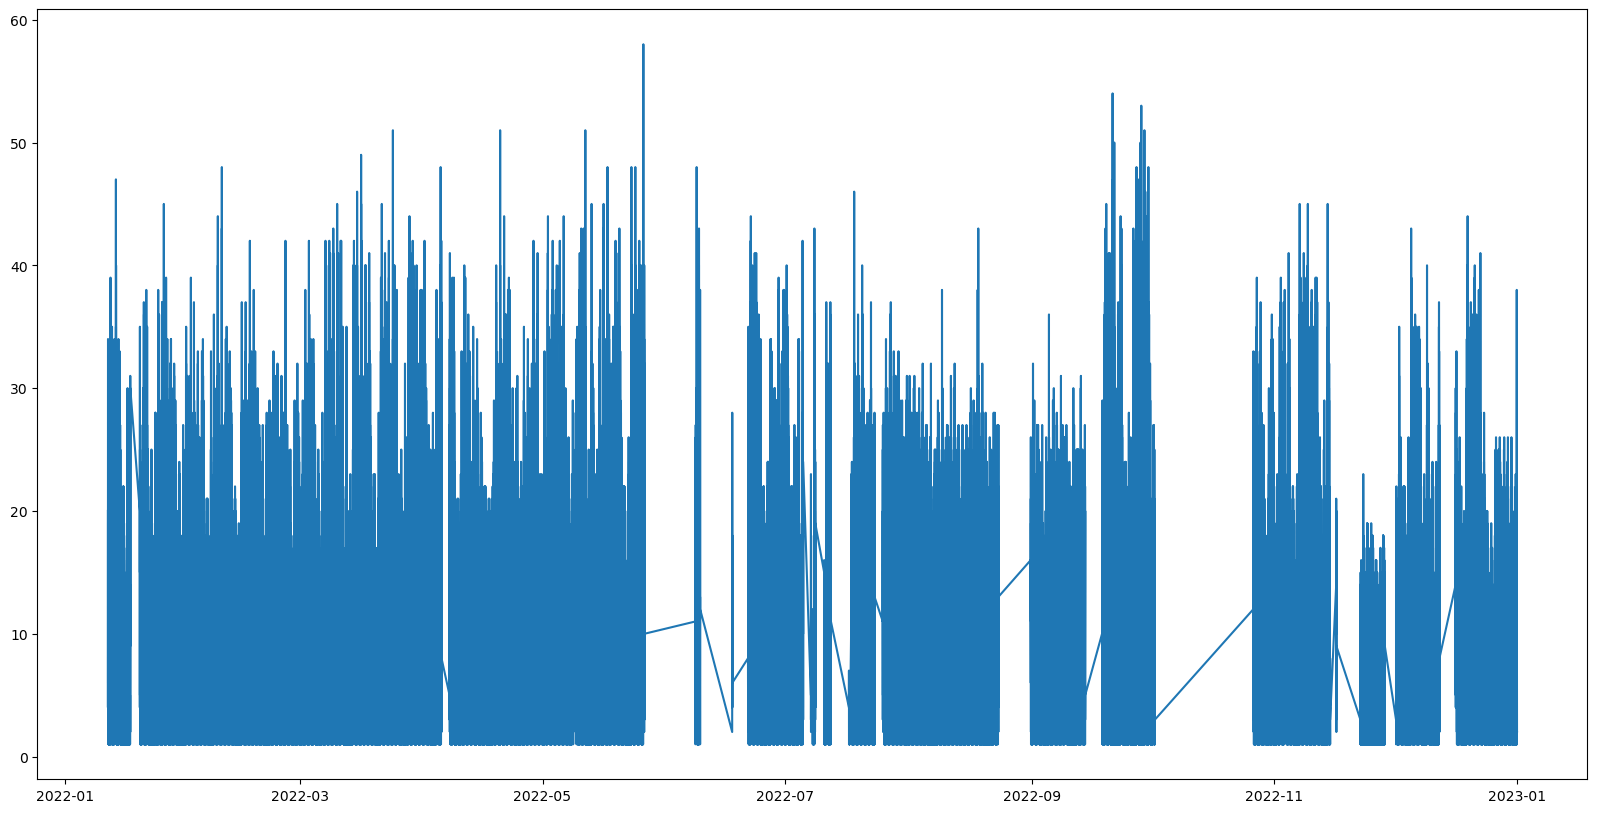

In [16]:
# convert time_index to datetime
dx = df.copy()
dx['time_index'] = pd.to_datetime(dx['time_index'])

# plot
plt.figure(figsize=(20,10))
plt.plot(dx['time_index'], dx['total'])
plt.show()


In [17]:
from fancyimpute import IterativeImputer

# convert time_index to datetime
df['time_index'] = pd.to_datetime(df['time_index'])

# convert time_index to strfttime
df['time_index'] = df['time_index'].dt.strftime('%Y-%m-%d %H:%M:%S')


# get 1st and last time_index
first = df['time_index'].iloc[0]
last = df['time_index'].iloc[-1]
# 2022-01-11 17:22:00 
# 2022-12-31 23:59:00


# for the missing values, replace with the mean of the previous and next values
df['vehiclelight'] = df['vehiclelight'].fillna((df['vehiclelight'].shift() + df['vehiclelight'].shift(-1))/2)
df['vehicleheavy'] = df['vehicleheavy'].fillna((df['vehicleheavy'].shift() + df['vehicleheavy'].shift(-1))/2)
df['vehicleothers'] = df['vehicleothers'].fillna((df['vehicleothers'].shift() + df['vehicleothers'].shift(-1))/2)
df['total'] = df['total'].fillna((df['total'].shift() + df['total'].shift(-1))/2)

# check again how many missing values
df.isnull().sum()

# for all entity_id that is null, put 'urn:ngsi-ld:Count:aveiro_radar:p35' instead
df['entity_id'] = df['entity_id'].fillna('urn:ngsi-ld:Count:aveiro_radar:p35')

time_ent = df[['time_index', 'entity_id']]

# print the days with missing values
df[df.isnull().any(axis=1)]['time_index'].unique()

# data without the time_index column
df2 = df.drop(['time_index', 'entity_id', 'faixa'], axis=1)

print(df2.head())

# now fill the missing values with the IterativeImputer

# calling the  MICE class
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
df2 = mice_imputer.fit_transform(df2)

# convert df2 to dataframe
df2 = pd.DataFrame(df2, columns=['vehiclelight', 'vehicleheavy', 'vehicleothers', 'total'])

# make all df2 values integers
df2 = df2.astype(int)

new_df = pd.DataFrame(columns=['time_index', 'entity_id', 'vehiclelight', 'vehicleheavy', 'vehicleothers', 'total'])
new_df = pd.concat([time_ent, new_df], ignore_index=True)

new_df['vehiclelight'] = df2['vehiclelight'].values
new_df['vehicleheavy'] = df2['vehicleheavy'].values
new_df['vehicleothers'] = df2['vehicleothers'].values
new_df['total'] = df2['total'].values

new_df

        vehiclelight  vehicleheavy  vehicleothers  total
689858            20             0              0     20
689859            13             0              3     16
689862             9             0              1     10
689863             6             0              4     10
689866            12             2              2     16


,time_index,entity_id,vehiclelight,vehicleheavy,vehicleothers,total
0,2022-01-11 17:22:00,urn:ngsi-ld:Count:aveiro_radar:p35,20,0,0,20
1,2022-01-11 17:22:01,urn:ngsi-ld:Count:aveiro_radar:p35,13,0,3,16
2,2022-01-11 17:23:00,urn:ngsi-ld:Count:aveiro_radar:p35,9,0,1,10
3,2022-01-11 17:23:01,urn:ngsi-ld:Count:aveiro_radar:p35,6,0,4,10
4,2022-01-11 17:24:00,urn:ngsi-ld:Count:aveiro_radar:p35,12,2,2,16
...,...,...,...,...,...,...
623107,2022-12-31 23:55:01,urn:ngsi-ld:Count:aveiro_radar:p35,1,0,0,1
623108,2022-12-31 23:56:00,urn:ngsi-ld:Count:aveiro_radar:p35,2,0,0,2
623109,2022-12-31 23:57:00,urn:ngsi-ld:Count:aveiro_radar:p35,1,0,0,1
623110,2022-12-31 23:57:01,urn:ngsi-ld:Count:aveiro_radar:p35,0,0,2,2


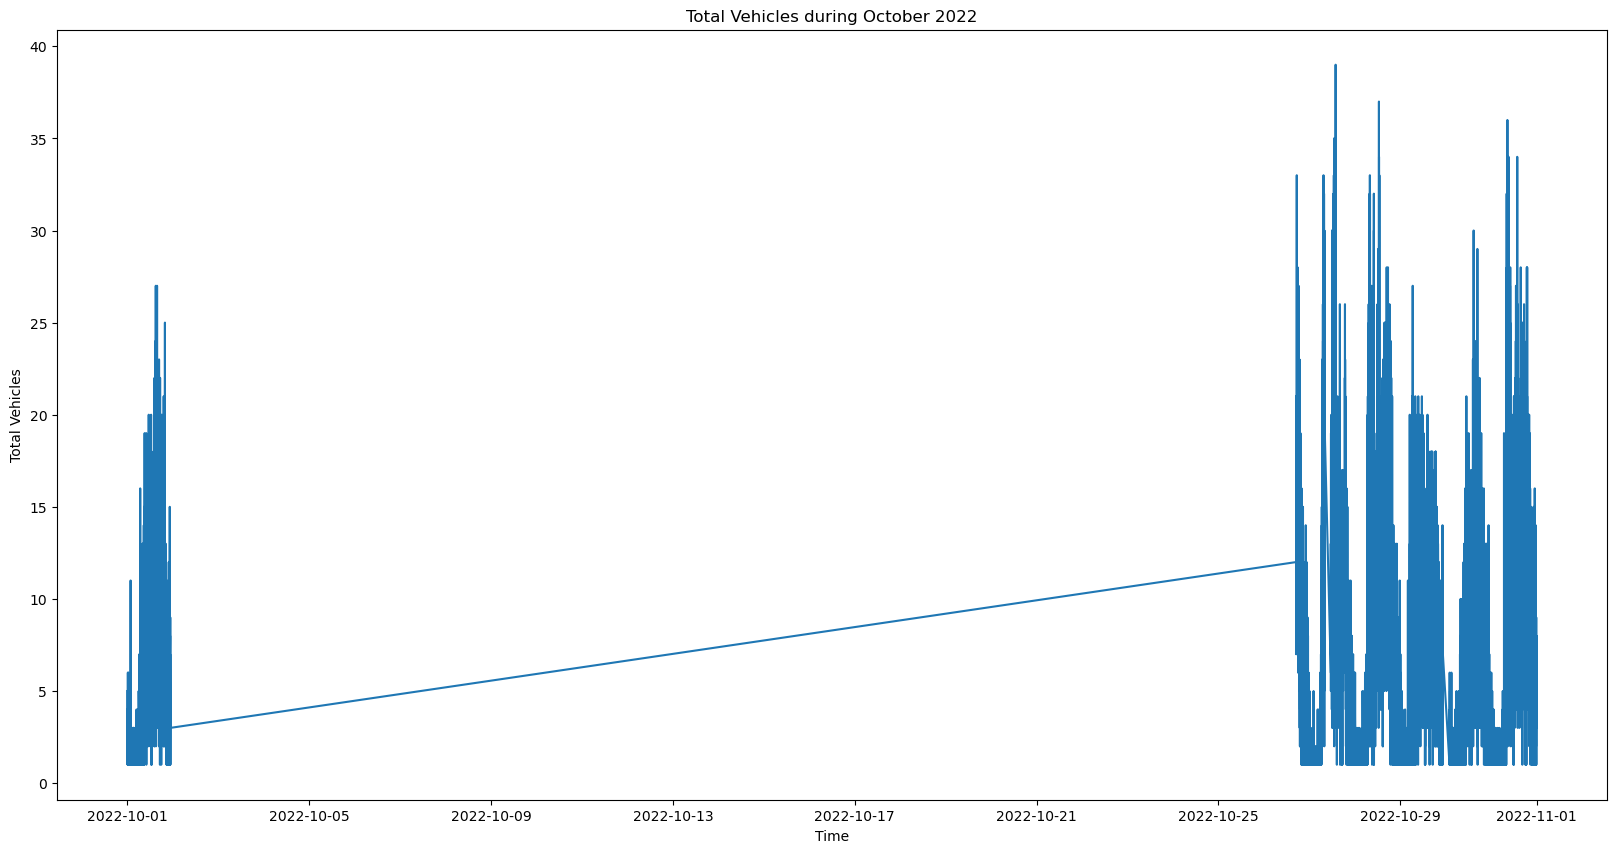

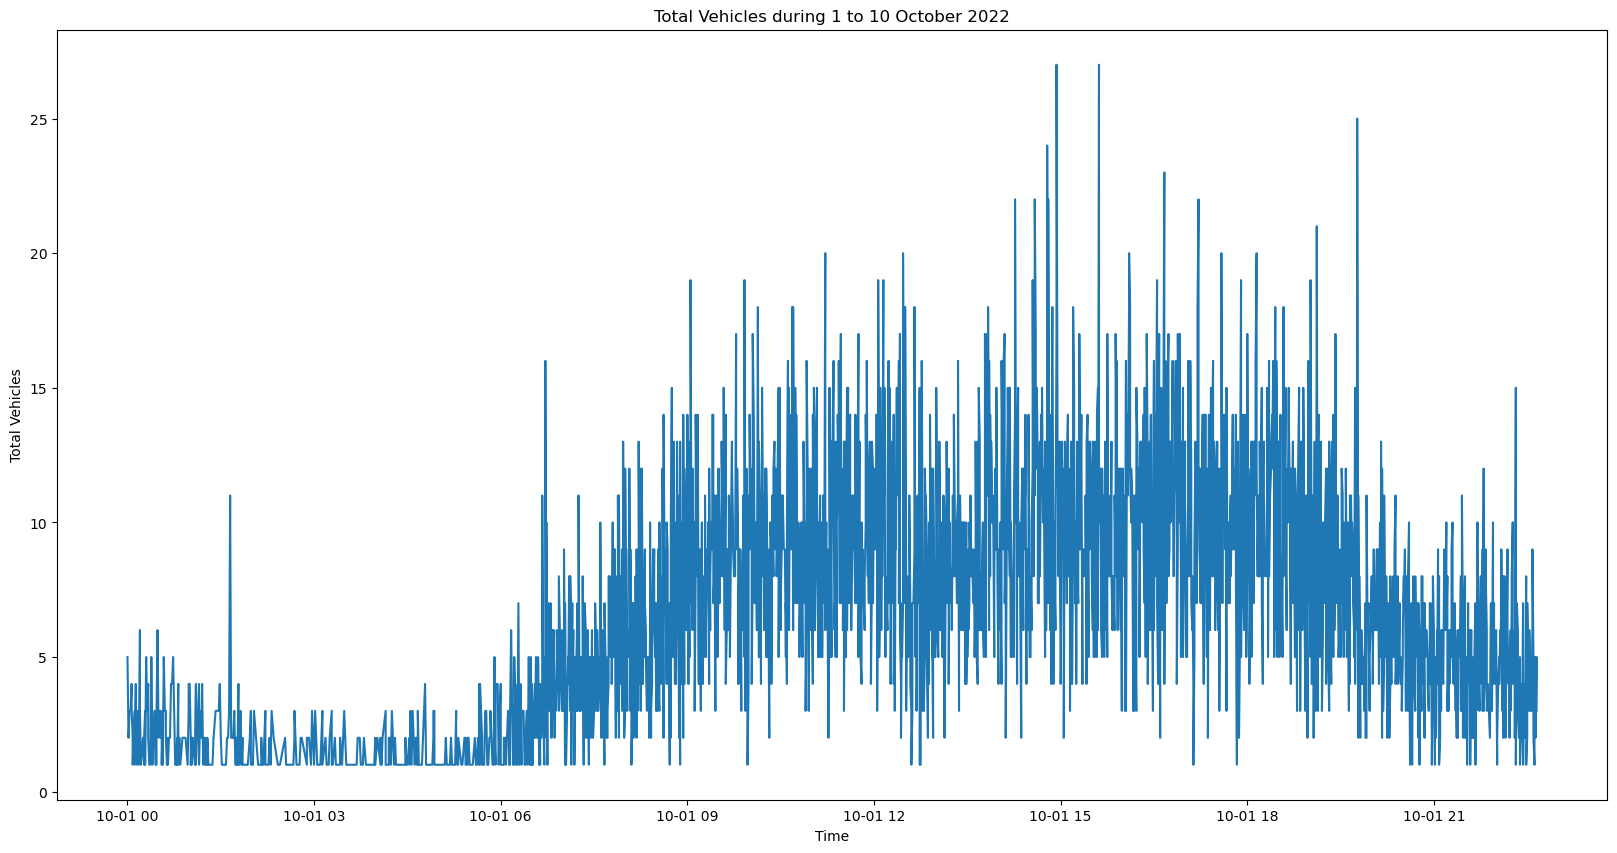

,time_index,entity_id,vehiclelight,vehicleheavy,vehicleothers,total
498119,2022-10-01 00:00:00,urn:ngsi-ld:Count:aveiro_radar:p35,4,0,1,5
498120,2022-10-01 00:01:00,urn:ngsi-ld:Count:aveiro_radar:p35,1,0,1,2
498121,2022-10-01 00:02:00,urn:ngsi-ld:Count:aveiro_radar:p35,3,0,0,3
498122,2022-10-01 00:03:00,urn:ngsi-ld:Count:aveiro_radar:p35,2,1,0,3
498123,2022-10-01 00:04:00,urn:ngsi-ld:Count:aveiro_radar:p35,4,0,0,4
...,...,...,...,...,...,...
500474,2022-10-01 22:37:01,urn:ngsi-ld:Count:aveiro_radar:p35,4,0,1,5
500475,2022-10-01 22:38:00,urn:ngsi-ld:Count:aveiro_radar:p35,5,0,0,5
500476,2022-10-01 22:38:01,urn:ngsi-ld:Count:aveiro_radar:p35,2,0,0,2
500477,2022-10-01 22:39:00,urn:ngsi-ld:Count:aveiro_radar:p35,5,0,0,5


In [18]:
# let take only the data during october
df_oct = new_df[(new_df['time_index'] >= '2022-10-01 00:00:00') & (new_df['time_index'] <= '2022-10-31 23:59:00')]
df_oct

# convert time_index to datetime
dx = df_oct.copy()
dx['time_index'] = pd.to_datetime(dx['time_index'])

# plot
plt.figure(figsize=(20,10))
plt.plot(dx['time_index'], dx['total'])
plt.xlabel('Time')
plt.ylabel('Total Vehicles')
plt.title('Total Vehicles during October 2022')
plt.show()


# let take only the data during 1 to 10 october
df_oct_1_10 = new_df[(new_df['time_index'] >= '2022-10-01 00:00:00') & (new_df['time_index'] <= '2022-10-10 23:59:00')]
df_oct_1_10

# convert time_index to datetime
dx = df_oct_1_10.copy()
dx['time_index'] = pd.to_datetime(dx['time_index'])

# plot
plt.figure(figsize=(20,10))
plt.plot(dx['time_index'], dx['total'])
plt.xlabel('Time')
plt.ylabel('Total Vehicles')
plt.title('Total Vehicles during 1 to 10 October 2022')
plt.show()

dx

In [19]:
# group by day
data_day = new_df.groupby(new_df['time_index'].dt.date).sum()
data_day = data_day.reset_index()

# plot
plt.figure(figsize=(20,10))
plt.plot(data_day['time_index'], data_day['total'])
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
from pandas.plotting import autocorrelation_plot

# plotting autocorrelation from all data
nn = nx.groupby(new_df['time_index'].dt.date).sum()
autocorrelation_plot(nn['total'])
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values